In [1]:
from utils import *
from icp import *

In [2]:
%load_ext autoreload
%autoreload 2

#### Load data

In [3]:
xlsx_pth = "C:/Users/lucas/Desktop/UPC/MIT/tactile2object/manus/recorded_data.xlsx"
data = Data(xlsx_pth)
positions_FT = data.getFingertips()

#### Get real data

In [4]:
bone = 'LeftSecondFT'
frames = [5900, 6009, 6190, 6340, 6423, 7690]

touch_locations_real = get_touch_locations_real(positions_FT, bone, frames)

#### Get simulated data

In [5]:
mesh_pth = "C:/Users/lucas/Desktop/UPC/MIT/tactile2object/estimate_object_pose/ycb_converted/035_power_drill.ply"
picked_ids = [6796, 5958, 3626, 153, 563, 4257]
touch_locations_simu, pcd = get_touch_locations_simu(mesh_pth, picked_ids=picked_ids, scale=1.)

#### Translate and rotate real points

In [6]:
Q = np.array(touch_locations_simu).T
P = np.array(touch_locations_real).T

P_values, norm_values, corresp_values, R, t = icp_svd(P, Q)

#plot_bar_values(norm_values)

In [7]:
red = [225/255, 87/255, 89/255]
orange = [242/255, 142/255, 43/255]
yellow = [237/255, 201/255, 72/255]
blue = [78/255, 121/255, 167/255]
green = [89/255, 161/255, 79/255]

In [8]:
touch_locations_real_tr = (R[0].dot(touch_locations_real.T) + t[0]).T

balls_real_tr = get_balls(touch_locations_real_tr, color=[0,1,0])
balls_simu = get_balls(touch_locations_simu)

In [9]:
line_set = get_lines(touch_locations_real_tr, touch_locations_simu)

visualize = [pcd] + balls_real_tr + balls_simu + [line_set]

o3d.visualization.draw_geometries(visualize, zoom=0.9,
                                  front=[0.0, 0.0, -0.5],
                                  lookat=[0.0, 0.0, 0.0],
                                  up=[0.0, 0.4, 0.0])

#### Translate and rotate simulated points

In [10]:
Q = np.array(touch_locations_real).T
P = np.array(touch_locations_simu).T 

P_values, norm_values, corresp_values, R, t = icp_svd(P, Q)

In [11]:
import copy

touch_locations_simu_tr = (R[0].dot(touch_locations_simu.T) + t[0]).T

balls_real = get_balls(touch_locations_real)
balls_simu_tr = get_balls(touch_locations_simu_tr, color=[0,1,0])

line_set = get_lines(touch_locations_real, touch_locations_simu_tr)

pcd_tr = copy.deepcopy(pcd)
pcd_tr.rotate(R[0], center=(0, 0, 0))
pcd_tr.translate((t[0]))

visualize = [pcd_tr] + balls_real + balls_simu_tr + [line_set]

o3d.visualization.draw_geometries(visualize)

#### Save keypoints for Minimal-IK: https://github.com/lucas-ventura/Minimal-IK

In [133]:
positions_order_l = [
    "LeftCarpus",
    "LeftSecondPP",
    "LeftSecondMP",
    "LeftSecondDP",
    "LeftThirdPP",
    "LeftThirdMP",
    "LeftThirdDP",
    "LeftFifthPP",
    "LeftFifthMP",
    "LeftFifthDP",
    "LeftFourthPP",
    "LeftFourthMP",
    "LeftFourthDP",
    "LeftFirstMC",
    "LeftFirstPP",
    "LeftFirstDP",
    "LeftSecondFT",
    "LeftThirdFT",
    "LeftFifthFT",
    "LeftFourthFT",    
    "LeftFirstFT"    
]

positions_order_r = [position.replace("Left", "Right") for position in positions_order_l]

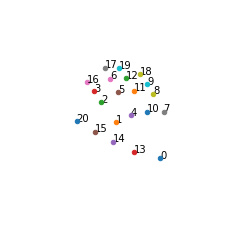

In [138]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

frame = 0

fig = plt.figure()
ax = fig.gca(projection='3d')

for i, a in enumerate(positions_order_l):
    x, y, z = positions_FT.loc[frame, a]
    
    ax.scatter(xs=x, ys=y, zs=z)
    ax.text(x, y, z, str(i), zdir=None)
    
set_axes_equal(ax)
plt.axis('off')
ax.view_init(azim=110, elev=168)


In [142]:
frame = 0

keypoints = np.zeros((len(positions_order_l), 3))

zero = 'LeftThirdMC'
#zero = 'LeftThirdPP'
position_zero = positions_FT.loc[frame, zero] * 1000 

for i, position in enumerate(positions_order):
    keypoints[i,:] = positions_FT.loc[frame, position] * 1000 - position_zero

In [141]:
frame = 0

keypoints = np.zeros((len(positions_order_r), 3))

zero = 'RightThirdMC'
position_zero = positions_FT.loc[frame, zero] * 1000 

for i, position in enumerate(positions_order_r):
    keypoints[i,:] = positions_FT.loc[frame, position] * 1000 - position_zero